In [38]:
#Canny edge detection Q1.1
import torch as T
import kornia as K

import matplotlib.pyplot as plt
import numpy as np

#Notes
#1) Matplotlib only works with numpy arrays, 
#make sure to change PyTorch Tensor back to numpy befure displaying

#2) B × C × H × W, where
#B represents a ‘batch’ of images (this will be 1 in your case), C is the channels, and H and W are height and
#width, respectively. Also, make sure you cast your array types to the proper type (e.g., torch.float32 in most
#cases) before performing operations on them

def Sobel(img, kernel):
    
    kernel = kernel.unsqueeze(0)
    kernel = kernel.unsqueeze(0)
    convo = T.conv2d(img, kernel, stride=1, padding=0)
   
    return convo 
        
def non_max_supression(g_mag, g_ori):
    # convert tensor to np.array to iterate faster
    g_mag: np.array = K.tensor_to_image(g_mag)
    g_ori: np.array = K.tensor_to_image(g_ori)

        
    out = np.zeros((img.shape), np.int32)
    g_ori = g_ori * 180. / np.pi
    g_ori[g_ori < 0] += 180

    
    for y in range(1,img.shape[0]-1):
        for x in range(1,img.shape[1]-2):
                p1 = 0
                p2 = 0
                
                #checks neighbouring pixels based on gradient orientation then checks if current pixel is greater than its neighbours
                #if it is, keep current pixel, else current pixel = 0
                
                if (0<= g_ori[y,x] < 22.5) or (157.5 <= g_ori[y,x] <= 180):
                    if(g_mag[y,x] >= g_mag[y, x+1]) and (g_mag[y,x] >= g_mag[y, x-1]):
                        out[y,x] = g_mag[y,x]
                   
                elif (22.5 <= g_ori[y,x] < 67.5):
                    if(g_mag[y,x] >= g_mag[y+1, x-1]) and (g_mag[y,x] >= g_mag[y-1, x+1]):
                        out[y,x] = g_mag[y,x]
              
                elif (67.5 <= g_ori[y,x] < 112.5):
                    if(g_mag[y,x] >= g_mag[y+1, x]) and (g_mag[y,x] >= g_mag[y-1, x]):
                        out[y,x] = g_mag[y,x]

               
                elif (112.5 <= g_ori[y,x] < 157.5):
                    if(g_mag[y,x] >= g_mag[y-1, x-1]) and (g_mag[y,x] >= g_mag[y+1, x+1]):
                        out[y,x] = g_mag[y,x]
                    

            
    return out
        

def g_mag_threshold(img, mag):
    
    new_img = np.zeros(img.shape, np.int32)
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if (img[y,x] < mag).all():
                new_img[y,x] = 0
            if (img[y,x] >= mag).all():
                new_img[y,x] = 255
    return new_img

        
def MyCanny(img, sigma, mag):
    #add padding
    pad = np.pad(img,1)
    pad = pad[:,:,1:4]
    #convert np.array to torch.tensor
    img_tensor: T.tensor = K.image_to_tensor(pad, keepdim = False).float()

    #grayscale the image
    gray_img = K.color.rgb_to_grayscale(img_tensor)    

    
    #Step 1 Smooth image with gaussian blur
    # kornia.filters.gaussian_blur2d(input, kernel_size, sigma, border_type='reflect', separable=True)[source]
    
    kernel = K.filters.GaussianBlur2d((15,15),(sigma,sigma))
    blur_img = kernel(gray_img)
    
#     canny: torch.Tensor = K.filters.canny(blur_img)[0]
#     canny: np.array = K.tensor_to_image(canny)

    #Step 2 Apply Sobel Operator
    Kx = T.tensor([[-1, 0, 1],
                 [-2, 0, 2],
                 [-1, 0, 1]],dtype=T.float32)
    
    Ky = T.tensor([[1, 2, 1],
                 [0, 0, 0],
                 [-1, -2, -1]],dtype=T.float32)
    
    ix = Sobel(blur_img, Kx)
    iy = Sobel(blur_img, Ky)
    
    g_mag = T.hypot(ix,iy)
    g_ori = T.atan2(iy, ix)

        
    #Step 3 non-maximum surpression
    
    nms = non_max_supression(g_mag, g_ori)
            
    #Step 4 Gradiant Magnitude threshhold
    
    img = g_mag_threshold(nms,mag)

                
    
    
    
    
    
    
    return img

In [52]:
#load image as an np.array and add padding
bof = 'lotus.jpg'
img: np.array = plt.imread(bof)

(1312, 1600, 3)

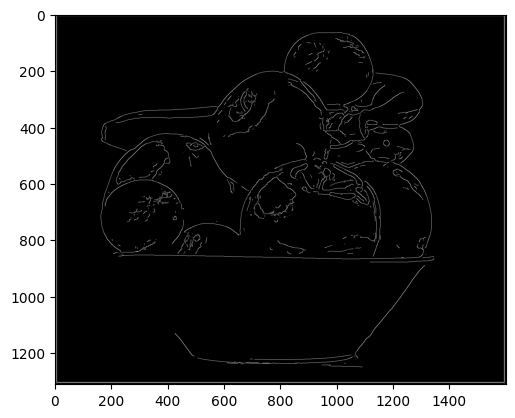

In [51]:
blur = MyCanny(img,5,15)
plt.imshow(blur, cmap='gray')
blur.shape

(879, 1200, 3)

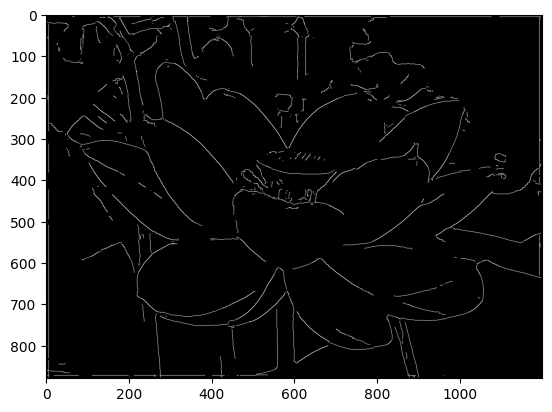

In [53]:
blur = MyCanny(img,5,15)
plt.imshow(blur, cmap='gray')
blur.shape

In [54]:
#Canny edge detection Q1.2
import torch as T
import kornia as K

import matplotlib.pyplot as plt
import numpy as np

#Notes
#1) Matplotlib only works with numpy arrays, 
#make sure to change PyTorch Tensor back to numpy befure displaying

#2) B × C × H × W, where
#B represents a ‘batch’ of images (this will be 1 in your case), C is the channels, and H and W are height and
#width, respectively. Also, make sure you cast your array types to the proper type (e.g., torch.float32 in most
#cases) before performing operations on them

def Sobel(img, kernel):
    
    kernel = kernel.unsqueeze(0)
    kernel = kernel.unsqueeze(0)
    convo = T.conv2d(img, kernel, stride=1, padding=0)
   
    return convo 
        
def non_max_supression(g_mag, g_ori):
    # convert tensor to np.array to iterate faster
    g_mag: np.array = K.tensor_to_image(g_mag)
    g_ori: np.array = K.tensor_to_image(g_ori)

        
    out = np.zeros((img.shape), np.int32)
    g_ori = g_ori * 180. / np.pi
    g_ori[g_ori < 0] += 180

    
    for y in range(1,img.shape[0]-1):
        for x in range(1,img.shape[1]-2):
                p1 = 0
                p2 = 0
                
                #checks neighbouring pixels based on gradient orientation then checks if current pixel is greater than its neighbours
                #if it is, keep current pixel, else current pixel = 0
                
                if (0<= g_ori[y,x] < 22.5) or (157.5 <= g_ori[y,x] <= 180):
                    if(g_mag[y,x] >= g_mag[y, x+1]) and (g_mag[y,x] >= g_mag[y, x-1]):
                        out[y,x] = g_mag[y,x]
                   
                elif (22.5 <= g_ori[y,x] < 67.5):
                    if(g_mag[y,x] >= g_mag[y+1, x-1]) and (g_mag[y,x] >= g_mag[y-1, x+1]):
                        out[y,x] = g_mag[y,x]
              
                elif (67.5 <= g_ori[y,x] < 112.5):
                    if(g_mag[y,x] >= g_mag[y+1, x]) and (g_mag[y,x] >= g_mag[y-1, x]):
                        out[y,x] = g_mag[y,x]

               
                elif (112.5 <= g_ori[y,x] < 157.5):
                    if(g_mag[y,x] >= g_mag[y-1, x-1]) and (g_mag[y,x] >= g_mag[y+1, x+1]):
                        out[y,x] = g_mag[y,x]
                    

            
    return out
        

def g_mag_threshold(img, low_threshold, high_threshold):
    
    #Saves the x and y cordinate of the “discovered” definite edge
    queueX = []
    queueY = []
    
    new_img = np.zeros(img.shape, np.int32)
    

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if (low_threshold < img[y,x]).all() and (img[y,x] < high_threshold).all():
                new_img[y,x] = 100
            elif (img[y,x] <= low_threshold).all():
                new_img[y,x] = 0
            elif (img[y,x] >= high_threshold).all():
                queueX.append(int(x))
                queueY.append(int(y))
                new_img[y,x] = 255
                
                
                
    return new_img, queueX, queueY

def BFS(img, sx, sy):
    
    y = sy[len(sy) - 1]
    x = sx[len(sx) - 1]
    
    
    #checks the surrounding pixels of the starting point. If the surrounding pixel is a weak pixel, we set it do definite edge
    #and send the new definite edge into the queue
    if(img[y,x + 1] == 100).all():
        img[y,x + 1] = 255
        sy.append(y)
        sx.append(x+1)
        
        img = BFS(img, sx, sy)
        
    if(img[y - 1,x] == 100).all():
        img[y-1,x] = 255
        sy.append(y-1)
        sx.append(x)
        
        img = BFS(img, sx, sy)
        
    if(img[y,x - 1] == 100).all():
        img[y,x-1] = 255
        sy.append(y)
        sx.append(x-1)
        
        img = BFS(img, sx, sy)
        
        
    if(img[y+1,x] == 100).all():
        img[y+1,x] = 255
        sy.append(y+1)
        sx.append(x)
        
        img = BFS(img, sx, sy)
     

    
    return img
        
def MyCannyFull(img, sigma, low_threshold, high_threshold):
    #add padding
    pad = np.pad(img,1)
    pad = pad[:,:,1:4]
    #convert np.array to torch.tensor
    img_tensor: T.tensor = K.image_to_tensor(pad, keepdim = False).float()

    #grayscale the image
    gray_img = K.color.rgb_to_grayscale(img_tensor)
    
    
    #Step 1 Smooth image with gaussian blur
    # kornia.filters.gaussian_blur2d(input, kernel_size, sigma, border_type='reflect', separable=True)[source]
    
    kernel = K.filters.GaussianBlur2d((15,15),(sigma,sigma))
    blur_img = kernel(gray_img)
    
#     canny: torch.Tensor = K.filters.canny(blur_img)[0]
#     canny: np.array = K.tensor_to_image(canny)


    #Step 2 Apply Sobel Operator
    Kx = T.tensor([[-1, 0, 1],
                 [-2, 0, 2],
                 [-1, 0, 1]],dtype=T.float32)
    
    Ky = T.tensor([[1, 2, 1],
                 [0, 0, 0],
                 [-1, -2, -1]],dtype=T.float32)
    
    ix = Sobel(blur_img, Kx)
    iy = Sobel(blur_img, Ky)
    
    g_mag = T.hypot(ix,iy)
    g_ori = T.atan2(iy, ix)

        
    #Step 3 non-maximum surpression
    
    nms = non_max_supression(g_mag, g_ori)
            
    #Step 4 Thresholds and Hysteresis
    #The process begins by marking all pixels with gradient magnitudes above the high threshold as a “discovered”
    #definite edge. These pixels are placed into a queue and become the starting points for a breadth first search
    #(BFS) algorithm.
    
    
    img, queueX, queueY = g_mag_threshold(nms, low_threshold, high_threshold)
    
    #iterates through each definite edge and beforms BFS algorithm at ea. starting point
    
    for i in range(len(queueX)-1):
        
        sx = []
        sy = []
        sx.append(queueX[i])
        sy.append(queueY[i])
        
        
        img = BFS(img,sx,sy)
        
        
        
    

    #Step 5 
                
    
    #removes any remaining weak pixels
    img[img<255] = 0
    
    
    
    return img

(1312, 1600, 3)

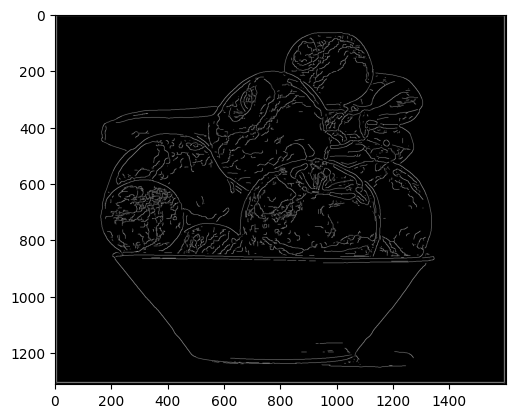

In [25]:
blur = MyCannyFull(img,5,3.5,8)
plt.imshow(blur, cmap='gray')
blur.shape

(879, 1200, 3)

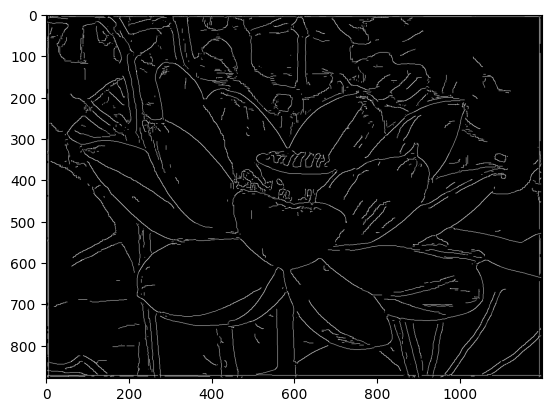

In [56]:
blur = MyCannyFull(img,5,3.5,8)
plt.imshow(blur, cmap='gray')
blur.shape

(1314, 1602)

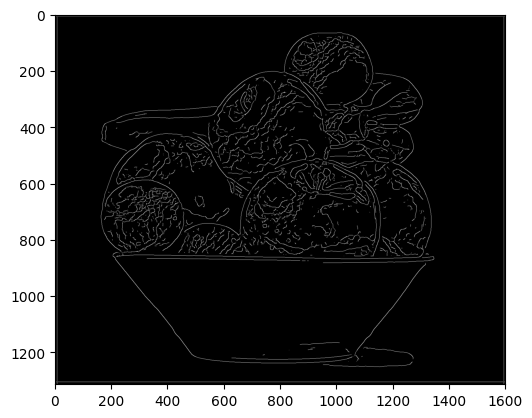

In [37]:
#Canny Edge function Kornia
#Use as reference for desire output
blur = MyCanny(gray_img,5,6)
plt.imshow(blur, cmap='gray')
blur.shape

In [87]:
#Seam Carving Q2
import torch as T
import kornia as K

import matplotlib.pyplot as plt
import numpy as np


def MySeamCarving(img, desire_width, desire_height):
        
    for w in range (img.shape[1]-desire_width):
        img = CarvingHelper(img)
        
    #transpose img
    img = np.rot90(img)
    img2 = np.copy(img)
    
    for h in range (img2.shape[1]-desire_height):
        img2 = CarvingHelper(img2)
        
    #transpose img    
    img2 = np.rot90(img2, axes = (1,0))    

    return img2






def CarvingHelper(img):
    img: T.tensor = K.image_to_tensor(img, keepdim = False).float()
        
#     1) Compute the energy image, E, for the input image, e.g., the sum of the gradient magnitude images
#     computed for each of the three colour channels of the input image. Here, you can use Kornia’s
#     SpatialGradient(mode=’sobel’).
    
    
    E: T.tensor = K.filters.spatial_gradient(img)
        
    # x and y derivatives for each color channel 
    Ix_r = E[:, 0, 0]
    Iy_r = E[:, 0, 1]
    
    Ix_g = E[:, 1, 0]
    Iy_g = E[:, 1, 1]
    
    Ix_b = E[:, 2, 0]
    Iy_b = E[:, 2, 1]
     
    # Magnitude of each color channel    
    ER = T.hypot(Ix_r,Iy_r)
    EG = T.hypot(Ix_g,Iy_g)
    EB = T.hypot(Ix_b,Iy_b)
    
    #Energy image = sume of magnitude of ea color channel
    E = ER + EG + EB
    E: np.array = K.tensor_to_image(E)

#     2) Create a scoring matrix, M, with spatial image dimensions matching those of the input image.
#     Set the values of the first row of the scoring matrix, M, to match those of the energy image, E.
    M:np.array = np.zeros(E.shape, np.float32)
    M[0] = E[0]
        
#     Set the values of every entry in the scoring matrix to the energy value at that position and the minimum
#     value in any of the neighbouring cells above it in the seam, i.e.,
#     M[row, col] = E[row, col] + min (M[row − 1, col − 1], M[row − 1, col], M[row − 1, col + 1])


    for y in range (1,E.shape[0]):
        for x in range(E.shape[1]): 
            
            left = max(0,x-1)
            right = min(x+1,E.shape[1])
            M[y,x] = E[y,x] + np.amin(M[y-1,left:right])
                
#      Find the minimum value in the bottom row of the scoring matrix. The corresponding position of the
#      minimal value is the bottom of the optimal seam.


    min_value = np.amin(M[M.shape[0]-1])
    y,x = np.where(M == min_value)
    
#     Using M[row, col], trace back up the seam by following the smallest value in any of the neighbouring
#     positions above
    seam = [x[0]]
    
    for y in range (M.shape[0]-1, -1, -1 ):
        if (y>0):
            index = seam[-1]

            left = max(0,index-1)
            right = min(index+1,M.shape[1])

            min_value = np.amin(M[y-1,left:right])

            h,w = np.where(M == min_value)
            h = np.where(h == (y-1))
            seam.append(w[h[0][0]])
        
        
#     Remove the seam from the image
    img: np.array = K.tensor_to_image(img)
    img = img.astype(int)

    seam.reverse()
    
    carv_img = np.zeros((img.shape[0],img.shape[1]-1,3))
    
    for i in range(img.shape[0]):

        new_array = np.delete(img[i], seam[i],axis = 0)
        carv_img[i] = new_array
    

    carv_img = carv_img.astype(int)
        
    return carv_img

In [88]:
#load image as an np.array and add padding
york = 'York_small.jpg'
img: np.array = plt.imread(york)
img.shape
# plt.imshow(img)

(333, 500, 3)

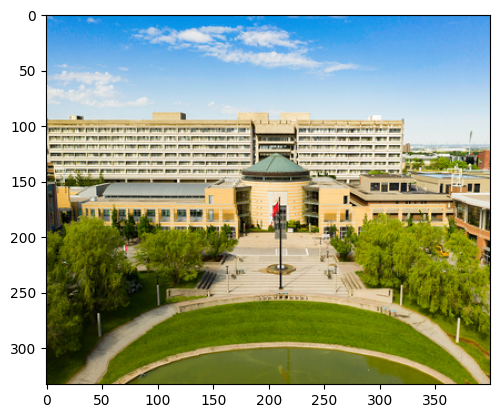

In [90]:

carv_img = MySeamCarving(img,400,333)
carv_img.shape
plt.imshow(carv_img)

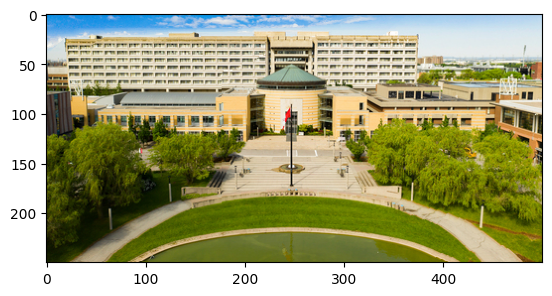

In [89]:
carv_img = MySeamCarving(img,500,250)
carv_img.shape
plt.imshow(carv_img)

In [95]:

lotus = 'lotus_small.jpg'
img: np.array = plt.imread(lotus)
img.shape
# plt.imshow(img

(220, 300, 3)

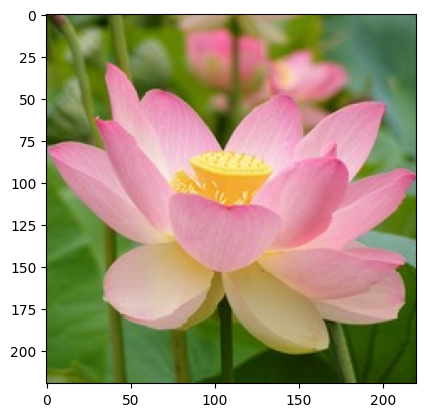

In [96]:
carv_img = MySeamCarving(img,220,220)
carv_img.shape
plt.imshow(carv_img)

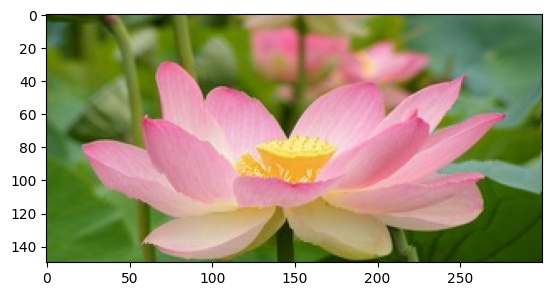

In [97]:
carv_img = MySeamCarving(img,300,150)
carv_img.shape
plt.imshow(carv_img)